Привет, Людмила!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего первого проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2
    
#### Успех
    
Спасибо тебе за доработку проекта. Теперь здесь все идеально и я готов принять работу. От себя желаю успехов в дальнейшей учебе. Ты точно справишься:) 
</div  

## Информация об исследовании и обрабатываемых данных.

Целью настоящего проекта является анализ исторических данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Необходимо выявить определяющие успешность игры закономерности для планирования рекламных кампаний на следующий год.

Данные представлены следующим датасетом с информацией об играх:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг игры от организации ESRB.

В результате исследования будут изучены закономерности о продажах игр в зависимости от временного периода, игровой платформы, жанра и места жительства пользователей.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
from numpy import median
import re
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
from scipy import stats as st

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Библиотеки распакованы. Супер. 
</div 

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
def study(df):
    df.columns = [x.lower() for x in df.columns.values]
    display(
        df.info(),
        df.head(5),
        df.describe()
    )
    print('Количество дубликатов:', df.duplicated().sum())

In [4]:
study(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Количество дубликатов: 0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здорово, с дублями все решили. 
</div 

Попробуем заполнить пропуски в столбце с годами и перевести его в целочисленный тип. 

In [5]:
games.loc[games["year_of_release"].isnull()]

name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  
183          8.5      E  
377          6.4      E  
456          7.9   E10+  
475          NaN    NaN  
609          NaN    NaN  
...          ...    ...  
16373        tbd   E10+  
16405        6.5      T  
16448        6.7      M  
16458        NaN    NaN  
16522        5.5      T  

[269 rows x 11 columns]

Заполним пропуски в колонке год значением 0.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Использовать такую логику замены здесь не совсем правильно. Часто в играх бывают указывают год, который не связан с годом выпуска. Например, Метро 2033. А еще производители спортивных игр часто выпускаюит в текущем году игру с годом следующим. Например, в 2022 выходит Fifa 2023. Тут пропусков мало и лучше их удалить или совсем не трогать. 
</div 

<div class="alert alert-block alert-info">
    

### Комментарий студента
Заменила пропуски на 0.

</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Здорово, с дублями все решили. 
</div  

In [6]:
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Изучим пропуски в столбце с жанрами.

In [8]:
games.loc[games["genre"].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Здесь 2 строки с игрой, у которой заодно пропуски в столбце с названием (выше можно видеть, что там как раз тоже 2 пропуска). Считаю, что их можно удалить.

In [9]:
games.dropna(subset = ['genre'], inplace=True)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь логично, соглашусь. 
</div 

In [10]:
games.loc[games['critic_score'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[8576 rows x 11 columns]

Можно видеть, что пропуски в столбце с оценкой пользователей совпадают с пропусками в строке с оценкой критиков и рейтингом. Вероятно данные об этих играх были взяты с ресурсов, на котором данные характеристики были недоступны. Посколько число пропусков в столбцах с оценкой пользователей и критиков разное, можно было бы дополнить оценку критиков оценкой пользователей, но они часто не сходятся во мнениях.

Также можно видеть, что у столбца user_score формат object. Для расчетов надо перевести его в числовой формат.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно хорошее предположение. 
</div 

In [11]:
games['user_score'].value_counts(ascending=False)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.9       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Очень много значений обозначено аббревиатурой tbd. По информации сайта metacritic.com, это те игры, которые набрали недостаточно отзывов для отображения оценки. 

In [12]:
games.loc[games['user_score']=='tbd']

name platform  year_of_release  \
119                               Zumba Fitness      Wii             2010   
301              Namco Museum: 50th Anniversary      PS2             2005   
520                             Zumba Fitness 2      Wii             2011   
645                                uDraw Studio      Wii             2010   
657    Frogger's Adventures: Temple of the Frog      GBA                0   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA             2001   
16697                          Bust-A-Move 3000       GC             2003   
16698                          Mega Brain Boost       DS             2008   
16704                                  Plushees       DS             2008   
16706             Men in Black II: Alien Escape       GC             2003   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

Заменим данное значение на NaN, т.к. по сути смысл здесь такой же, а формат столбца останется прежним

In [13]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Хочу поделиться с тобой таким классным методом, который позвол ит легко и просто показать и визуализировать пропуски http://espressocode.top/python-visualize-missing-values-nan-values-using-missingno-library/
</div 

Для последующих расчетов добавим столбец с общей суммой продаж.

In [15]:
games['total_sales']= games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень лаконичный метод, при помощи которого ты суммируешь результат. 
</div 

In [16]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

### Исследовательский анализ данных

#### Выбор актуального периода для изучения

Рассмотрим количество игр, выпущенных в разные годы. Возьмем для изучения только те строки, в которых есть информация о годе выпуска.

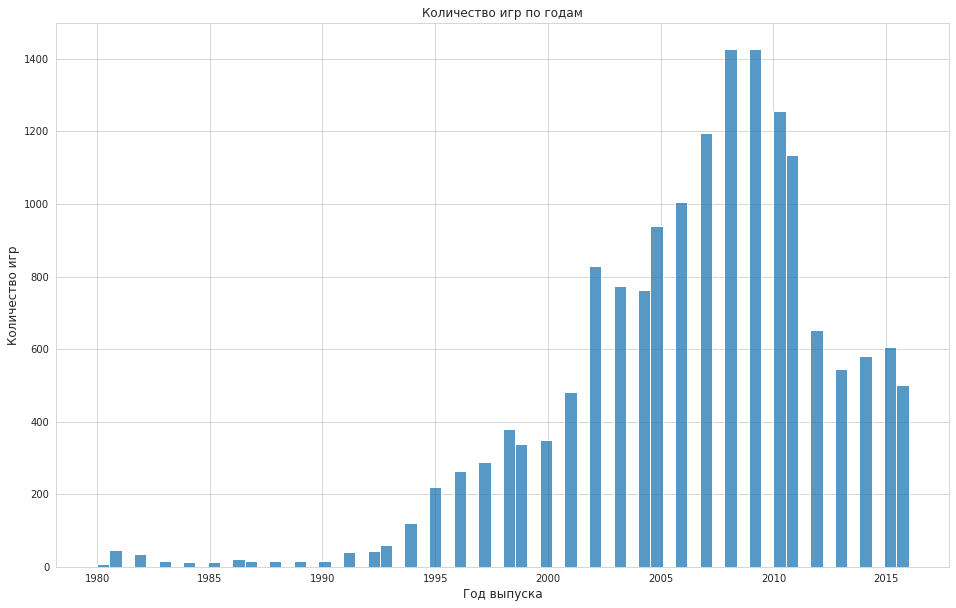

In [17]:
distribution_per_year = games.loc[(games['year_of_release']!=0)]
f, ax = plt.subplots(figsize=(16, 10))
sns.histplot(
    distribution_per_year,
    x='year_of_release')
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Количество игр', size=12)
plt.title('Количество игр по годам', size=12)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут прям отличный график получился. Тут видно как вел себя выпуск платформ. Мы видим, что после 2009 года произошло падение. 
</div 

Данные представлены с 1980 года, но за первые 20 лет информации слишком мало. Изучим данные с 2000 года, т.к. после него наблюдается заметный рост.

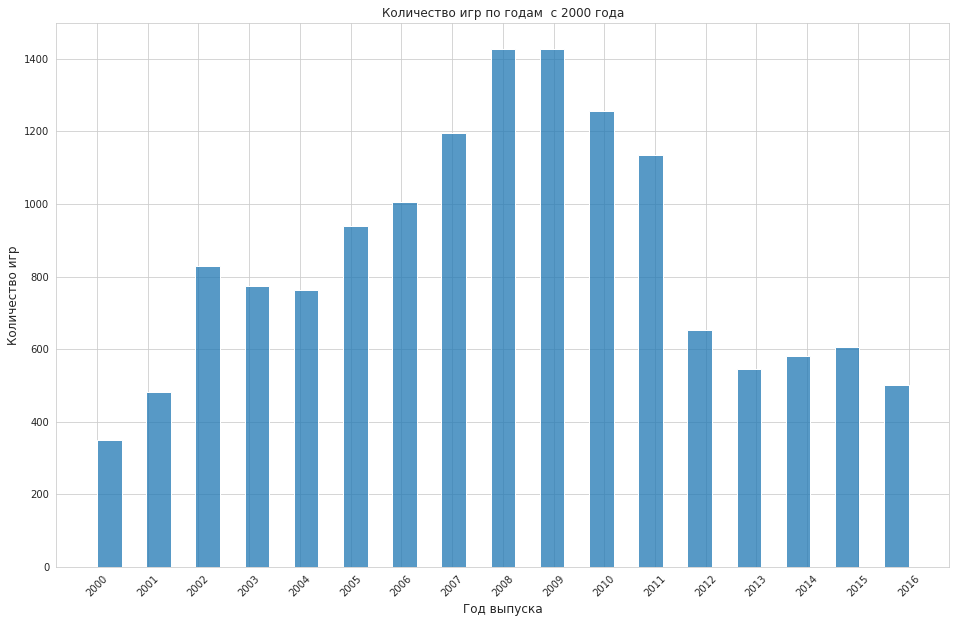

In [18]:
distribution_per_year = games.loc[(games['year_of_release']>=2000)]
f, ax = plt.subplots(figsize=(16, 10))
sns.histplot(distribution_per_year, x='year_of_release')
ax.set_xticks(distribution_per_year['year_of_release'].unique().tolist())
plt.xticks(rotation=45)
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Количество игр', size=12)
plt.title('Количество игр по годам  с 2000 года', size=12)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Падение как раз связано с тем, что  начали популяризироваться мобильные игры. 
</div 

Изучим продажи в зависимости от платформы. Так как платформ много, а хочется посмотреть их все и что-то понять, воспользуемся plotly.

In [19]:
games_per_year = games.loc[(games['year_of_release']!=0)]\
.groupby(['year_of_release', 'platform'])['total_sales']\
.sum()\
.reset_index()
fig = px.line(games_per_year,
              x='year_of_release',
              y='total_sales', color='platform')
fig.update_layout(autosize=False, width=950, height=700,
                  title='Сумма продаж по платформам', xaxis_title='Год выпуска', yaxis_title='Сумма продаж')
fig.show()

Информация на графике соответствует истории развития игр. В 1983 году продают и позже ликвидируют платформу Atari. SNES в конце 1993 году достигает пика популярности, а потом идет на спад. В 2004 году большую популярность получает PS2, а в 2009 году - Wii, когда она стала самой продаваемой платформой Nintendo

В целом видно, что старые модели исчезают и появляются новые после перехода компаний на 32-битные приставки.

Теперь необходимо определить актуальный период для предсказания продаж на следующий год. Проверим, нужно ли брать данные с 2000 года, изученные ранее, или можно использовать более короткий период.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь мне нравится твой разбор данных с графика. 
</div 

In [20]:
alive_platforms = games.loc[(games['year_of_release'].isin([2015, 2016]))]['platform'].unique()

Проверим, какие платформы еще существуют в 2015-2016 гг.

In [21]:
alive_platforms

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Сгруппируем данные по суммарным продажам для каждой из "живых" платформ за 2000 года.

In [22]:
sales_by_year = games.loc[(games['year_of_release']>=2000)&games['platform'].isin(alive_platforms)].\
groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index() 

Возьмем за минимальный порог продажи в 1 млн копий, посчитаем для каждой из платформ количество лет, когда продажи превышали этот порог и посчитаем среднее количество таких лет.

In [23]:
sales_by_year.loc[(sales_by_year['total_sales']>1)]\
.groupby('platform')\
.agg({'year_of_release':'count'})\
['year_of_release'].mean()

8.5

Получилось 8,5 лет. Поскольку примерно половину жизненного цикла платформы продажи растут, а потом падают, актуальным будет период в 4 года. Т.к. данные за 2016 год неполные, возьмем для расчетов информацию с 2012 года.

In [24]:
games = games.loc[(games['year_of_release']>=2012)]

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, нам не стоит обращать внимание на очень старые данные. 
</div 

#### Продажи в зависимости от платформы.

Изучим данные по платформам за выбранный период.

In [25]:
games_per_year = games.groupby(['year_of_release', 'platform'])['total_sales']\
.sum()\
.reset_index()
fig = px.line(games_per_year,
              x='year_of_release',
              y='total_sales', color='platform')
fig.update_layout(autosize=False, width=950, height=700,
                  title='Сумма продаж по платформам', xaxis_title='Год выпуска', yaxis_title='Сумма продаж')
fig.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь у тебя классный интерактивный график. 
</div 

По результатам 2015 года самыми успешными стали платформы PS4 и XOne, после выпуска которых PS3 и X360 резко потеряли популярность. Продажи игр для PC меньше, но они сохраняют относительную стабильность.

In [26]:
fig = px.box(games, x='platform', y="total_sales")
fig.update_layout(autosize=False, width=950, height=700,
                  title='Разброс продаж по платформам', xaxis_title='Платформа', yaxis_title='Сумма продаж')
fig.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот тут тоже очень правильно, что сделан интерактивный график. Так удобно рассмотреть и медиану и квантили. 
</div 

Лидеры, как и на предыдущем графике, платформы от Playstation и Xbox. Интересно посмотреть, что это за игры с самыми высокими продажами.

In [27]:
games.loc[(games['total_sales']==21.05)]

name platform  year_of_release   genre  na_sales  eu_sales  \
16  Grand Theft Auto V      PS3             2013  Action      7.02      9.09   

    jp_sales  other_sales  critic_score  user_score rating  total_sales  
16      0.98         3.96          97.0         8.2      M        21.05

In [28]:
games.loc[(games['total_sales']==16.27)]

name platform  year_of_release   genre  na_sales  eu_sales  \
23  Grand Theft Auto V     X360             2013  Action      9.66      5.14   

    jp_sales  other_sales  critic_score  user_score rating  total_sales  
23      0.06         1.41          97.0         8.1      M        16.27

Это GTA и снова GTA - ничего удивительного.

Посмотрим ближе на продажи до 5 млн., чтобы среднее значение было лучше видно.

In [29]:
fig = px.box(games.loc[(games['total_sales']<=5)], x='platform', y="total_sales")
fig.update_layout(autosize=False, width=950, height=700,
                  title='Разброс продаж по платформам', xaxis_title='Платформа', yaxis_title='Сумма продаж')
fig.show()

Медианное значение лучше всех у X360. На предыдущем графике было видно, что самых популярных игр с высокими продажами у нее тоже достаточно. Но лидирует по количеству игр такого рода все же PS4.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Отличный разбор получился у тебя. 
</div 

#### Влияние отзывов на продажи.

Изучим более подробно влияние отзывов пользователей и критиков на продажи для 2 платформ от Playstation и 2 от Xbox. 

In [30]:
def platform_study(platform_name):
    df = games.loc[(games['platform']==platform_name),
                ['platform', 'user_score', 'critic_score', 'total_sales']]
    cm = df.corr()
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, square=True)
    plt.show()
    for col in df.drop(['total_sales', 'platform'], axis = 1).columns:
        sns.scatterplot(x=df['total_sales'], y=df[col])
        plt.show()

Построим тепловую карту и диаграммы рассеяния для платформы.

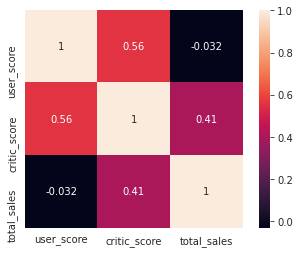

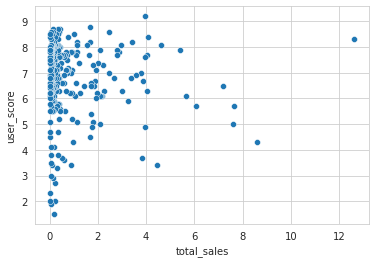

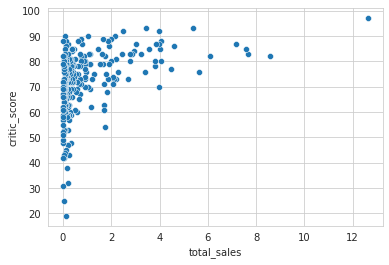

In [31]:
platform_study('PS4')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот тут ты очень хорошо на графиках показываешь зависимость цены от оценок критиков и пользователей. 
</div 

Можно наблюдать слабую корреляцию между продажами и оценкой критиков. Отрицательная корреляция продаж с оценкой пользователей очень слабая, и мы не можем принимать ее в расчет.

Проверим то же самое для ps3.

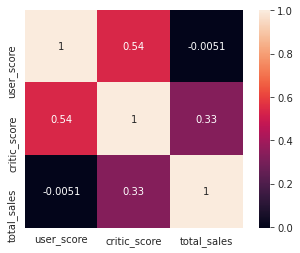

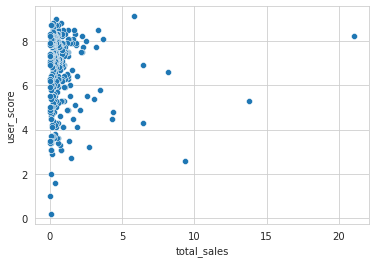

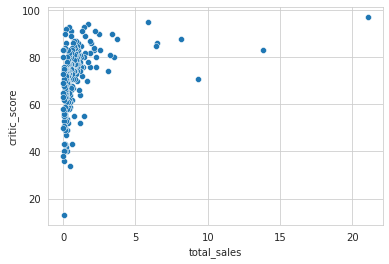

In [32]:
platform_study('PS3')

Зависимость от оценки критиков еще слабее. Для уверенности посмотрим еще Xbox.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
У этой платформы уже не такая сильная связь выходит. 
</div 

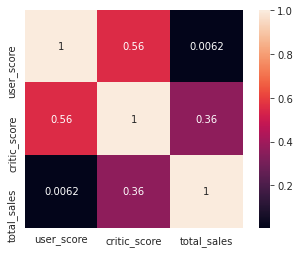

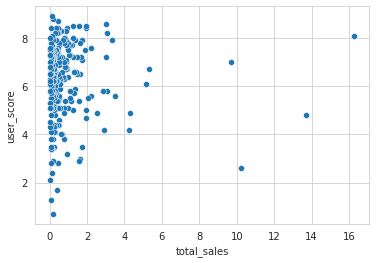

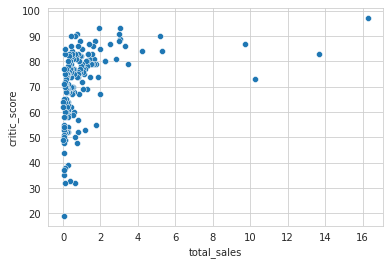

In [33]:
platform_study('X360')

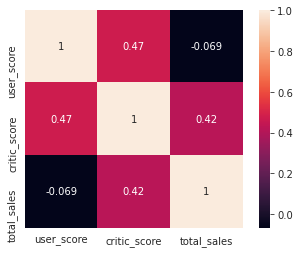

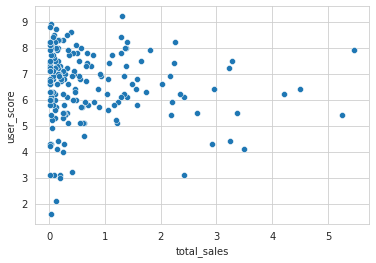

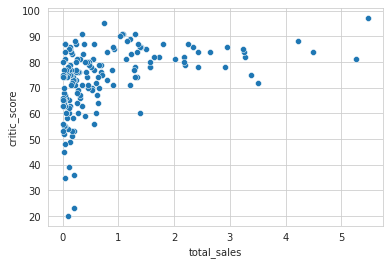

In [34]:
platform_study('XOne')

Ни по одной из платформ связь продаж с оценкой пользователей и критиков нельзя оценить даже как среднюю.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хороший разбор. Выводы на основе двух платформ выглядят убедительнее. 
</div 

#### Влияние жанра на продажи

Сначала посмотрим на распределение жанров по количеству.

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

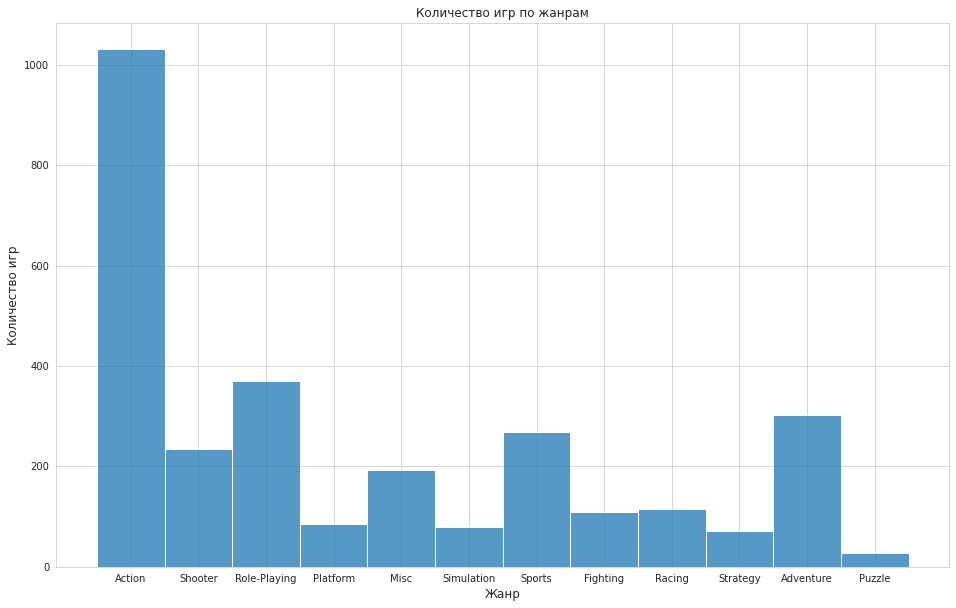

In [35]:
display(games['genre'].value_counts())
f, ax = plt.subplots(figsize=(16, 10))
sns.histplot(
    games,
    x='genre')
plt.xlabel('Жанр', size=12)
plt.ylabel('Количество игр', size=12)
plt.title('Количество игр по жанрам', size=12)
plt.show()

Самым продуктивным жанром является Action. Игр жанров Role-playing, Sports и Adventure меньше в несколько раз. Рассмотрим продажи в зависимости от жанра.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По общим продажам так и есть, но нас интересуют не общие. 
</div 

In [36]:
genre_sales = games.groupby('genre')\
.agg({'total_sales':'sum'})\
.sort_values(by='total_sales', ascending=False)\
.reset_index()
genre_sales

genre  total_sales
0         Action       441.12
1        Shooter       304.73
2   Role-Playing       192.80
3         Sports       181.07
4           Misc        85.04
5       Platform        61.00
6         Racing        53.50
7       Fighting        44.49
8     Simulation        35.12
9      Adventure        29.43
10      Strategy        13.34
11        Puzzle         4.89

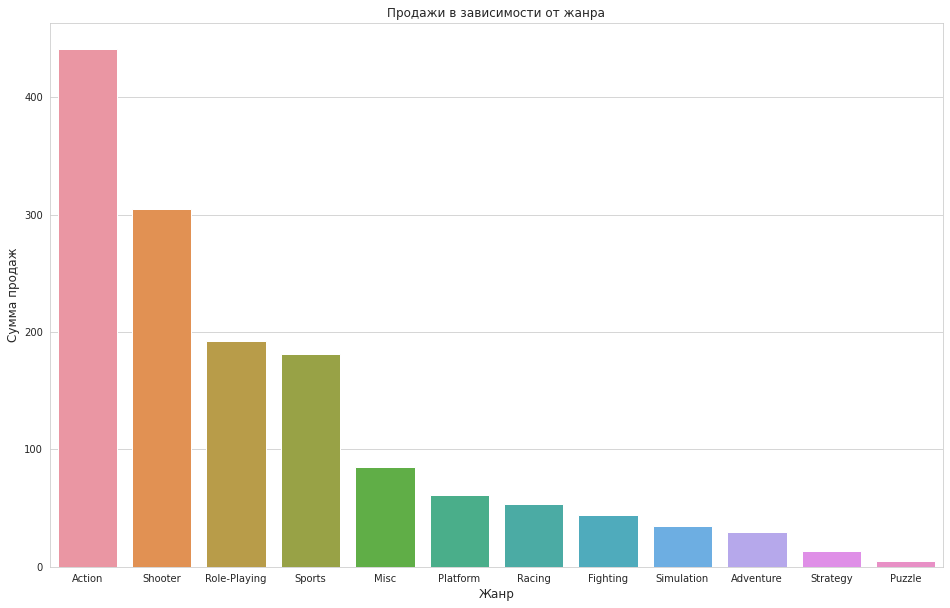

In [37]:
f, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='genre', y='total_sales', data=genre_sales)
plt.xlabel('Жанр', size=12)
plt.ylabel('Сумма продаж', size=12)
plt.title('Продажи в зависимости от жанра', size=12)
plt.show()

Суммарные продажи конечно же больше всего по играм жанра Action, хотя шутеры отстают не слишком сильно. Посмотрим на продажи в среднем.

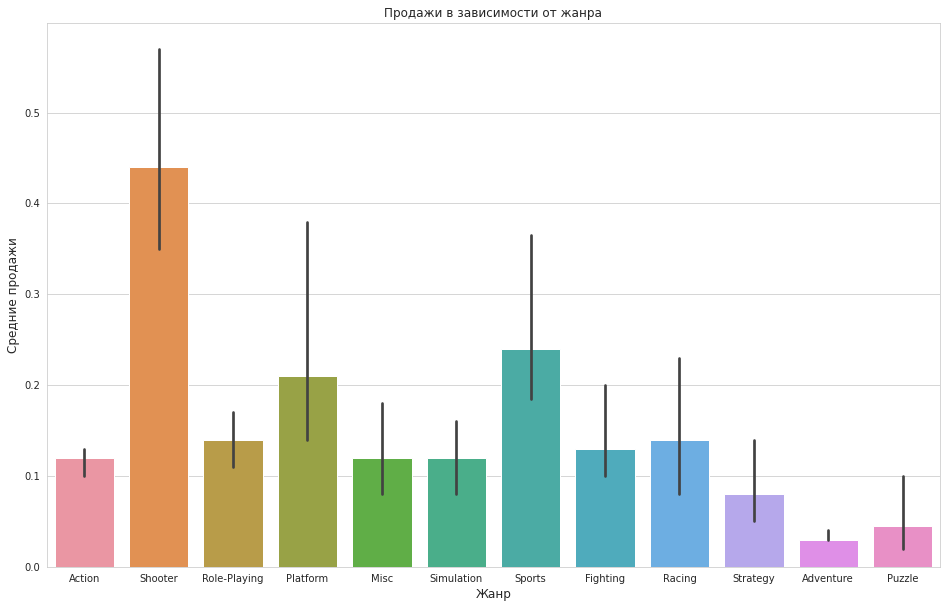

In [38]:
f, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='genre', y='total_sales', data=games, estimator=median)
plt.xlabel('Жанр', size=12)
plt.ylabel('Средние продажи', size=12)
plt.title('Продажи в зависимости от жанра', size=12)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот медианные как раз показывают, что выводы тут другие. 
</div 

Здесь видно, что в среднем сумма продаж больше у игр жанра шутер, далее идут спорт и платформеры, а у игр жанра Action продажи меньше. Изучим более подробно самые прибыльные жанры.

In [39]:
def genre_study(genre_name):
    df = games.loc[(games['genre']==genre_name)].reset_index()
    top_10 = df[['name', 'total_sales']]\
    .groupby('name')\
    .agg({'total_sales': 'sum'})\
    .sort_values(by='total_sales', ascending=False).head(10)
    print(
        f"Средняя оценка пользователей: {round(df['user_score'].mean(), 2)}\n\n"
        f"Средняя оценка критиков: {round(df['critic_score'].mean(), 2)}\n\n"
        f"Количество игр по рейтингу:\n{df['rating'].value_counts()}\n\n"
        "Топ-10 игр\n",
        top_10
    )
    f, ax = plt.subplots(figsize=(10, 8))
    sns.histplot(df, x='year_of_release')
    ax.set_xticks(df['year_of_release'].unique().tolist())
    plt.xlabel('Год выпуска', size=12)
    plt.ylabel('Количество игр', size=12)
    plt.title('Количество игр по годам', size=12)
    plt.show()
    f, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(data=df, x='year_of_release', y='total_sales')
    ax.set_xticks(df['year_of_release'].unique().tolist())
    plt.xlabel('Год выпуска', size=12)
    plt.ylabel('Сумма продаж', size=12)
    plt.title('Продажи по годам', size=12)
    plt.show()

Сначала шутеры.

Средняя оценка пользователей: 6.44

Средняя оценка критиков: 73.42

Количество игр по рейтингу:
M       158
T        27
E10+     16
Name: rating, dtype: int64

Топ-10 игр
                                 total_sales
name                                       
Call of Duty: Black Ops II            29.40
Call of Duty: Ghosts                  27.39
Call of Duty: Black Ops 3             25.67
Call of Duty: Advanced Warfare        21.97
Battlefield 4                         13.94
Destiny                               12.54
Star Wars Battlefront (2015)          12.19
Halo 4                                 9.71
Far Cry 4                              8.50
Far Cry 3                              7.31


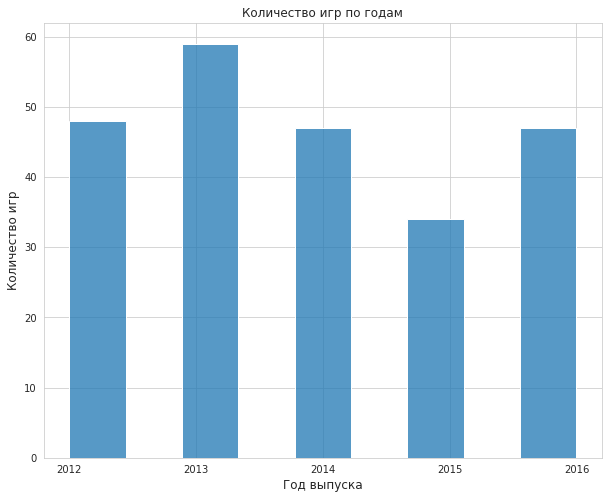

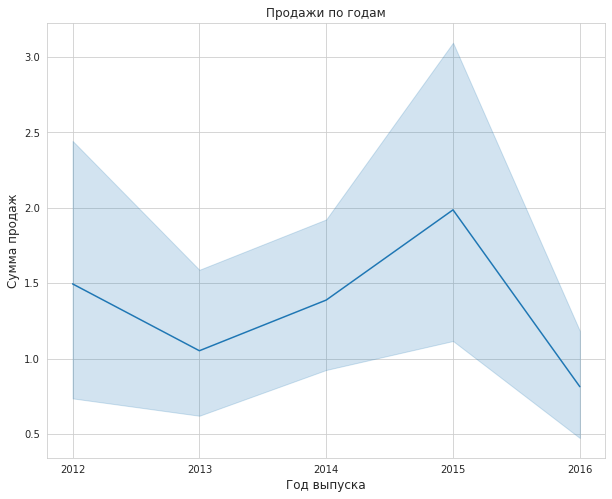

In [40]:
genre_study('Shooter')

- На первых четырех местах умы фанатов захватила Call of Duty, Battlefield менее популярна (видимо из-за любви к платным DLC).
- После 2013 г. количество игр снизилось, но теперь снова растет.
- Самые высокие продажи были в 2015 г.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ты здесь проявила себя и сделала даже больше, чем требовалось в проекте. От этого результат будет более ценным и это даст дополнительный плюс при написании вывода. 
</div 

Теперь спорт.

Средняя оценка пользователей: 5.46

Средняя оценка критиков: 72.9

Количество игр по рейтингу:
E       166
T        24
E10+     18
Name: rating, dtype: int64

Топ-10 игр
                total_sales
name                      
FIFA 15              17.37
FIFA 14              16.46
FIFA 16              16.30
FIFA 17              11.48
NBA 2K16              7.98
Madden NFL 16         7.40
Madden NFL 15         7.26
NBA 2K15              7.15
NBA 2K14              6.97
Madden NFL 13         6.45


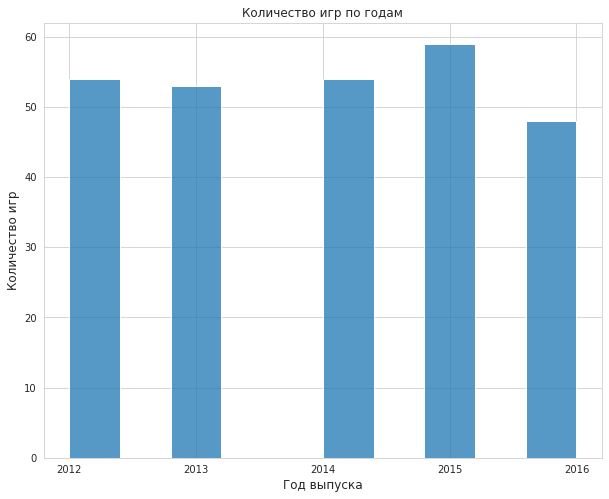

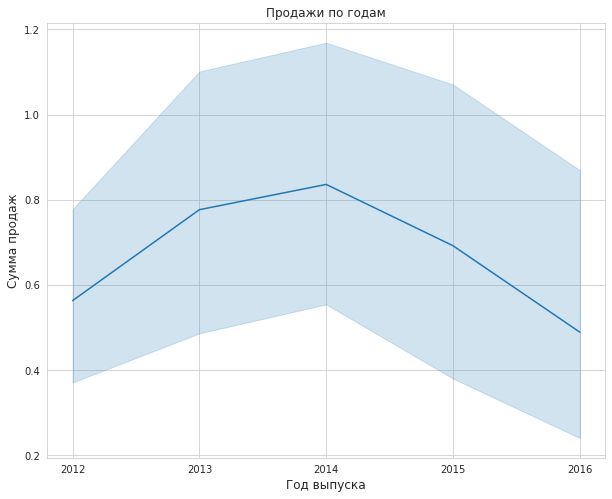

In [41]:
genre_study('Sports')

Здесь чуть ниже оценки пользователей, чем в прошлый раз, и меньше сумма продаж. Зато количество игр больше. Лидируют, конечно же, FIFA и NBA.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Действительно, тут уже чуть хуже. 
</div 

Посмотрим еще жанр Action, т.к. там самое большое количество игр.

Средняя оценка пользователей: 6.83

Средняя оценка критиков: 71.38

Количество игр по рейтингу:
M       215
T       138
E10+    130
E        73
Name: rating, dtype: int64

Топ-10 игр
                                  total_sales
name                                        
Grand Theft Auto V                     56.58
FIFA Soccer 13                         15.97
Assassin's Creed IV: Black Flag        13.06
Assassin's Creed III                   13.01
The Last of Us                         10.58
LEGO Marvel Super Heroes                9.41
Watch Dogs                              9.18
Assassin's Creed: Unity                 8.01
Tomb Raider (2013)                      6.31
LEGO Batman 2: DC Super Heroes          6.11


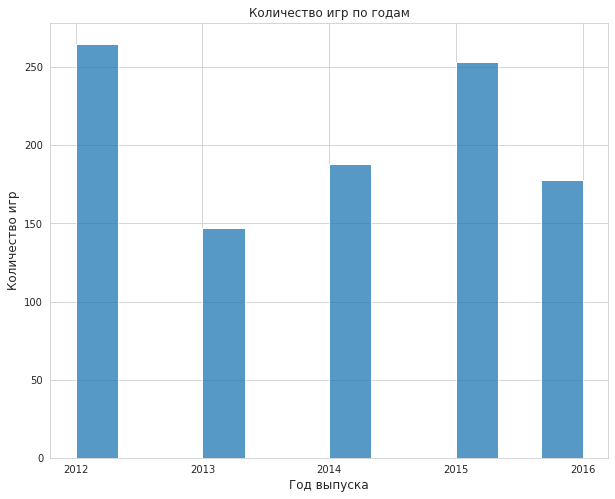

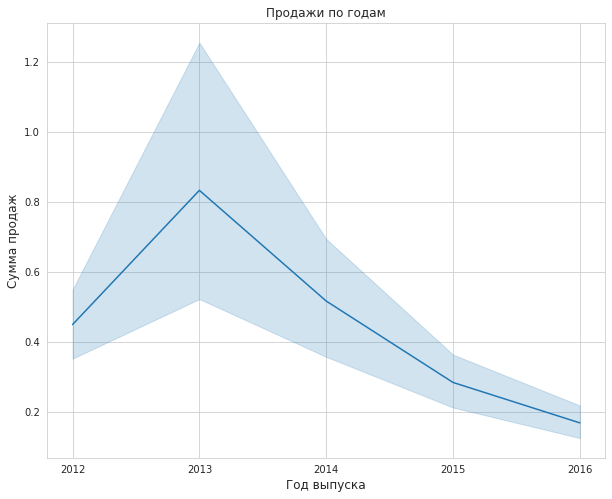

In [42]:
genre_study('Action')

Хотя оценки пользователей и выше, и игр больше, продажи все равно невысокие, несмотря на главного лидера - GTA. Несмотря на известность Assassin's Creed и The Last of us, продажи FIFA Soccer выше.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все по делу. 
</div 

#### Различия между пользователями регионов.

In [43]:
def users_study(subject): # функция для вывода таблицы с продажами и графика
    for region in games.columns.to_list()[4:8]:
        subject_by_region = games[[subject, region]]\
        .groupby(by=subject)\
        .sum()\
        .sort_values(by=[region], ascending = False)\
        .head(5)\
        .reset_index()
        subject_by_region['percentage'] = subject_by_region\
        .apply(lambda x: round(100*x[region]/subject_by_region[region].sum(),2),
               axis=1)
        print(subject_by_region, '\n')
        if subject=='platform':
            sns.barplot(x=subject, y='percentage', data=subject_by_region, palette='rocket')
            plt.xlabel('Платформа')
            plt.title(f'{region}: Топ-5 платформ', size=12)
        elif subject=='genre':
            sns.barplot(x=subject, y='percentage', data=subject_by_region, palette='mako')
            plt.xlabel('Жанр')
            plt.title(f'{region}: Топ-5 жанров', size=12)
        elif subject=='rating':
            sns.barplot(x=subject, y='percentage', data=subject_by_region, palette='YlOrBr_r')
            plt.xlabel('Рейтинг')
            plt.title(f'{region}: Рейтинг', size=12)
        plt.ylabel('Процент продаж')
        plt.show()

Изучим самые популярные платформы для пользователей разных регионов.

  platform  na_sales  percentage
0     X360    140.05       27.98
1      PS4    108.74       21.72
2      PS3    103.38       20.65
3     XOne     93.12       18.60
4      3DS     55.31       11.05 



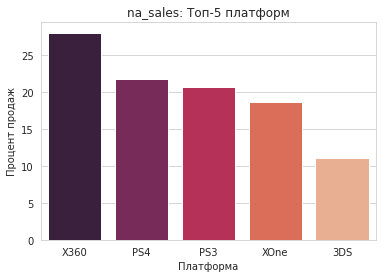

  platform  eu_sales  percentage
0      PS4    141.09       33.86
1      PS3    106.86       25.64
2     X360     74.52       17.88
3     XOne     51.59       12.38
4      3DS     42.64       10.23 



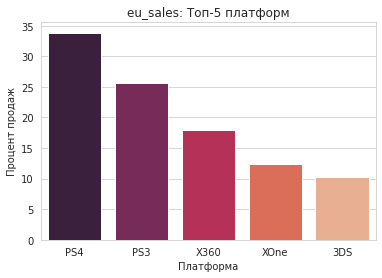

  platform  jp_sales  percentage
0      3DS     87.79       50.72
1      PS3     35.29       20.39
2      PSV     21.04       12.16
3      PS4     15.96        9.22
4     WiiU     13.01        7.52 



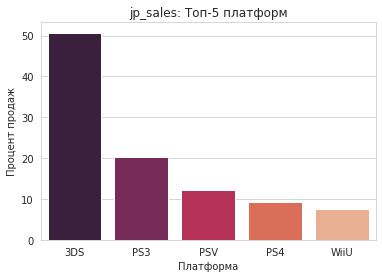

  platform  other_sales  percentage
0      PS4        48.35       35.78
1      PS3        43.26       32.01
2     X360        20.40       15.09
3     XOne        14.27       10.56
4      3DS         8.87        6.56 



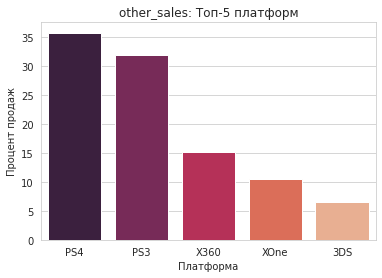

In [44]:
users_study('platform')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Когда выводишь результат по разным показателям на графиках, для восприятия лучше всего красить их в другой цвет. 
</div 

<div class="alert alert-block alert-info">
    

### Комментарий студента
Поменяла цвета.

</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Так намного лучше 
</div  

Можно видеть, что в разных регионах доминируют консоли от разных производителей:
- Являясь платформой от американского производителя Microsoft, Xbox популярнее всего в США,
- Благодаря активному продвижению, более ранней дате выхода первой консоли, а следовательно и большому количеству пользователей, привыкших к продукту, Playstation популярна в Европе,
- 3DS от Nintendo популярнее всего в Японии из-за того, что ориентируется в первую очередь на местный рынок: молодые пользователи проводят много времени в общественном транспорте, не имеют возможности из-за правил этикета разговаривать по телефону, не имеют достаточно времени на прохождение длинных сюжетов и предпочитают шутерам более спокойные игры.

Теперь изучим популярность различных жанров.

          genre  na_sales  percentage
0        Action    177.84       35.12
1       Shooter    144.77       28.59
2        Sports     81.53       16.10
3  Role-Playing     64.00       12.64
4          Misc     38.19        7.54 



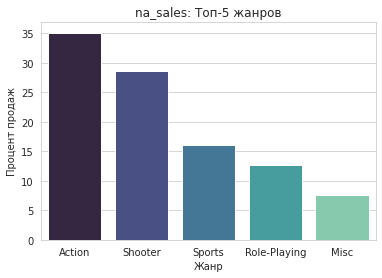

          genre  eu_sales  percentage
0        Action    159.34       38.15
1       Shooter    113.47       27.16
2        Sports     69.09       16.54
3  Role-Playing     48.53       11.62
4        Racing     27.29        6.53 



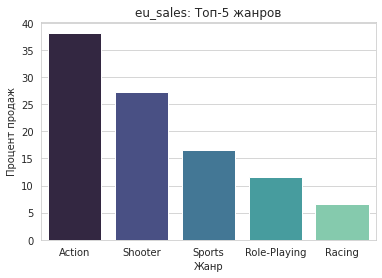

          genre  jp_sales  percentage
0  Role-Playing     65.44       43.35
1        Action     52.80       34.98
2          Misc     12.86        8.52
3    Simulation     10.41        6.90
4      Fighting      9.44        6.25 



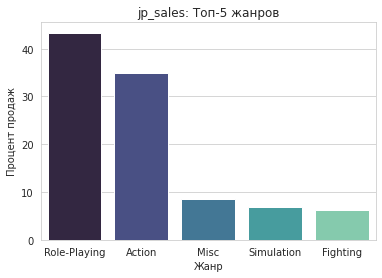

          genre  other_sales  percentage
0        Action        51.14       38.35
1       Shooter        37.26       27.94
2        Sports        22.44       16.83
3  Role-Playing        14.83       11.12
4          Misc         7.67        5.75 



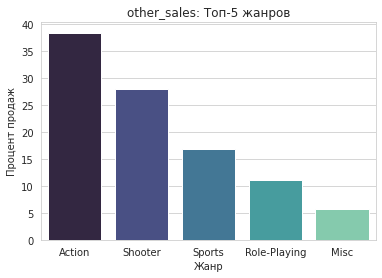

In [45]:
users_study('genre')

Игры жанра экшн и шутеры лидируют везде, кроме Японии. Там на первой позиции стоят ролевые игры, а шутеры вообще отсутствуют в топе. Это также связано с особенностями аудитории и большим количеством японских РПГ, созданных в первую очередь для внутреннего рынка.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь особенно видно, что Япония наиболее уникальна. 
</div 

Теперь рассмотрим продажи в зависимости от рейтинга. В таблице представлены игры 4 рейтингов:
- «E» («Everyone») — «Для всех» (от 6 лет)
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам» (от 13 лет)
- «M» («Mature») — «Для взрослых» (от 17 лет)

  rating  na_sales  percentage
0      M    231.57       47.49
1      E    114.37       23.45
2   E10+     75.70       15.52
3      T     66.02       13.54 



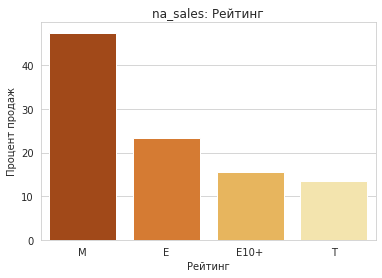

  rating  eu_sales  percentage
0      M    193.96       46.70
1      E    113.03       27.22
2   E10+     55.37       13.33
3      T     52.96       12.75 



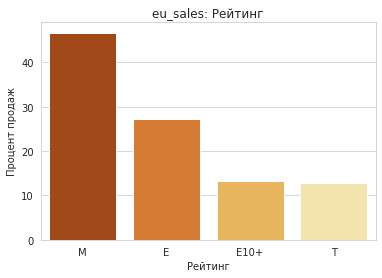

  rating  jp_sales  percentage
0      E     28.33       33.83
1      T     26.02       31.07
2      M     21.20       25.32
3   E10+      8.19        9.78 



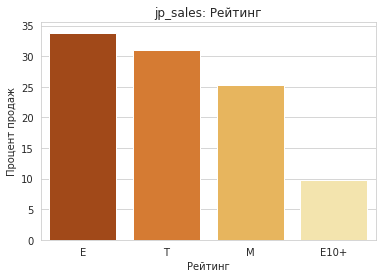

  rating  other_sales  percentage
0      M        63.38       49.14
1      E        31.44       24.37
2      T        17.94       13.91
3   E10+        16.23       12.58 



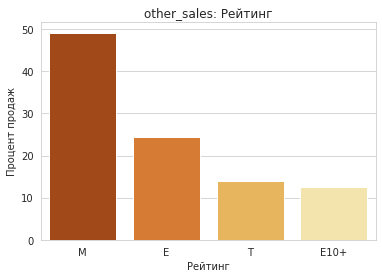

In [46]:
users_study('rating')

Полученные графики подтверждают ранее сделанный вывод о том, что в Японии самыми популярными являются более спокойные игры рейтинга "для всех", тогда как пользователи других регионов предпочитают шутеры, которые содержат насилие и маркируются рейтингом "для взрослых".

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В целом, по всем регионам можно сделать вывод, что каждый регион имеет свою специфику. Это нам обязательно стоит учесть при прогнозе на 2017. 
</div 

## Проверка гипотез

Поскольку проверяемые гипотезы связаны с пользовательскими рейтингами, оставим только те строки, в которых указан рейтинг.

In [47]:
hypotesis_testing = games.loc[games['user_score'].notnull()]
hypotesis_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1531 non-null   object 
 1   platform         1531 non-null   object 
 2   year_of_release  1531 non-null   int64  
 3   genre            1531 non-null   object 
 4   na_sales         1531 non-null   float64
 5   eu_sales         1531 non-null   float64
 6   jp_sales         1531 non-null   float64
 7   other_sales      1531 non-null   float64
 8   critic_score     1297 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1481 non-null   object 
 11  total_sales      1531 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 155.5+ KB


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В данном случае сравниваются средние двух генеральных совокупностей: игры на разных платформах, поэтому применим Т-тест. Критический уровень статистической значимости примем равным 5%.

Сформулируем гипотезы:

    H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    H1 - средние пользовательские рейтинги платформ Xbox One и PC различаются

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Гипотезы сформулированы. Супер. 
</div 

Сначала узнаем, каково количество игр для каждой платформы.

In [48]:
print('Количество игр на XOne:', len(hypotesis_testing.loc[hypotesis_testing['platform']=='XOne']))
print('Количество игр на PC:', len(hypotesis_testing.loc[hypotesis_testing['platform']=='PC']))
if len(hypotesis_testing.loc[hypotesis_testing['platform']=='PC'])==\
len(hypotesis_testing.loc[hypotesis_testing['platform']=='XOne']):
    print('Выборки равны')
else:
    print('Выборки не равны')

Количество игр на XOne: 182
Количество игр на PC: 206
Выборки не равны


Расчитаем дисперсии двух генеральных совокупностей, чтобы понять, равны они или нет.

In [49]:
print('Дисперсия для XOne:', np.var(hypotesis_testing.loc[hypotesis_testing['platform']=='XOne']['user_score']))
print('Дисперсия для PC', np.var(hypotesis_testing.loc[hypotesis_testing['platform']=='PC']['user_score']))

Дисперсия для XOne: 1.8965188383045526
Дисперсия для PC 2.7569952398906588


Поскольку дисперсии не равны, необходимо учесть это при проверке гипотез.

In [50]:
user_score_XOne = hypotesis_testing.loc[hypotesis_testing['platform']=='XOne']['user_score']
user_score_PC = hypotesis_testing.loc[hypotesis_testing['platform']=='PC']['user_score']
alpha = .05

results = st.ttest_ind(
    user_score_XOne, 
    user_score_PC,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Метод проверки выбран верно. С выводом согласен. 
</div 

Построим график оценки пользователей по месяцам, чтобы визуализировать ее для разных платформ.

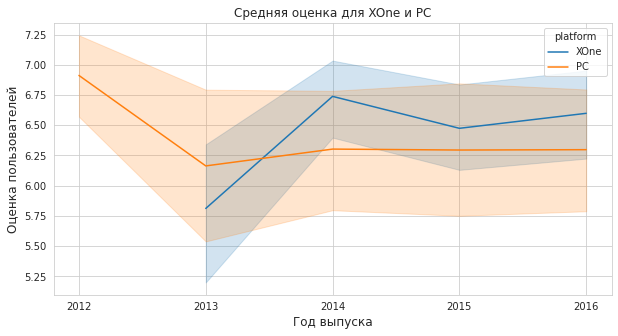

In [51]:
data = hypotesis_testing.loc[(hypotesis_testing['platform']=='XOne')|(hypotesis_testing['platform']=='PC')]
f, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=data, x='year_of_release', y='user_score', hue='platform', estimator='mean')
ax.set_xticks(data['year_of_release'].unique().tolist())
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Оценка пользователей', size=12)
plt.title('Средняя оценка для XOne и PC', size=12)
plt.show()

Оценка пользователей игр на XOne выше, но несущественно.

### Средние пользовательские рейтинги жанров Action и Sports разные.

В данном случае также изучаются независимые совокупности: игры разных жанров, поэтому вновь применим Т-тест. Критический уровень статистической значимости примем равным 5%.

Сформулируем гипотезы:

H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые
H1 - средние пользовательские рейтинги жанров Action и Sports различаются

Проведем те же вычисления, что были выше.

Количество игр жанра Action: 523
Количество игр жанра Sports: 195
Выборки не равны

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу



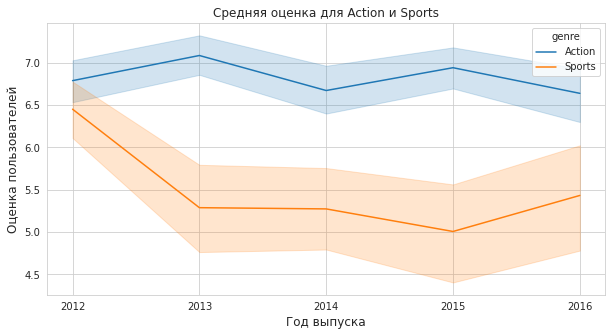

In [52]:
print('Количество игр жанра Action:', len(hypotesis_testing.loc[hypotesis_testing['genre']=='Action']))
print('Количество игр жанра Sports:', len(hypotesis_testing.loc[hypotesis_testing['genre']=='Sports']))
if len(hypotesis_testing.loc[hypotesis_testing['genre']=='Action'])==\
len(hypotesis_testing.loc[hypotesis_testing['genre']=='Sports']):
    print('Выборки равны')
else:
    print('Выборки не равны\n')

user_score_action = hypotesis_testing.loc[hypotesis_testing['genre']=='Action']['user_score']
user_score_sports = hypotesis_testing.loc[hypotesis_testing['genre']=='Sports']['user_score']

alpha = .05

results = st.ttest_ind(
    user_score_action, 
    user_score_sports,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу\n")
else:
    print("Не получилось отвергнуть нулевую гипотезу\n") 
    
data = hypotesis_testing.loc[(hypotesis_testing['genre']=='Action')|(hypotesis_testing['genre']=='Sports')]
f, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=data, x='year_of_release', y='user_score', hue='genre', estimator='mean')
ax.set_xticks(data['year_of_release'].unique().tolist())
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Оценка пользователей', size=12)
plt.title('Средняя оценка для Action и Sports', size=12)
plt.show()

В данном случае видны более сильные различия между оценками пользователей, в связи с чем нулевая гипотеза была отвергнута: средние пользовательские рейтинги игр жанров экшн и спорт действительно разные.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот и здесь классно получилось разобрать. Я вижу, что тему по Гипотезам ты хорошо освоила. 
</div 

## Общий вывод.

По результатам исследования можно сделать следующие выводы.
- После перехода на 32-битные приставки наблюдается рост популярности и как следствие продаж игровых платформ, отличных от ПК.
- Для предсказания продаж на следующий год можно использовать информацию примерно за 4 года, т.к.средний жизненный цикл платформы с учетом продаж более 1 млн. копий составляет 8.5 лет.
- Игровой рынок разделен между различными производителями в зависимости от региона, поэтому в целом лидируют Playstation, Xbox и Nintendo. При этом Xbox лидирует в США, Playstation в Европе, а Nintendo в Японии, что связано с особенностями аудитории и политикой продвижения платформ.
- Оценки пользователей на продажи не влияют, оценки критиков влияют слабо.
- В целом по рынку самыми продаваемыми являются игры жанра шутер и спорт. Среди первых лидером является серия Call of Duty, среди вторых - FIFA и NBA. При изучении информации по отдельным регионам можно наблюдать различия в предпочтениях: европейские и американские пользователи предпочитают игры жанров экшн, шутеры и более высокий рейтинг, пользователи из Японии - ролевые игры и рейтинги "для всех" и "для подростков". 
- Также в ходе исследования были проверены гипотезы о равенстве среднего пользовательского рейтинга для игр на PC и XOne (для данных платформ различия в среднем рейтинге не слишком значительные), а также для игр жанров экшн и спорт (здесь рейтинги различаются).

При выработке стратегии на следующий год магазину игр следует учитывать регион его расположения. Соответственно, если он находится в России, можно отдать предпочтение играм на Playstation высокого рейтинга жанров экшн и шутер.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А где Итоговый вывод? Не сохранился? 
</div 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Вот а сейчас хорошая и полноценная работа получилась. 
</div  

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Благодарю тебя за выполнение проекта. Мне очень понравилось, как ты разобралась с Исследовательским анализом данных. Твои выводы вполне логичны и все на своих местах. Ты подбираешь правильные методы для анализа и строишь хорошие графики. Особо хочу отметить использование интерактивной визуализавции. Это прям следующий уровень. Вся работа очень последовательна и логична. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Требуется переделать замену пропусков по годам.
* Переписать итоговый вывод.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>